<a href="https://colab.research.google.com/github/DiwakarBasnet/Machine-Learning/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

If data points in a graph between dependent and independent variables have non-linear relationship between them, then a linear regression model would give error in predictions. In this case, we have to build a polynomial relationship which will accurately fit the data points. This is called <b>Polynomial Regression</b>. The formula for Polynomial Regression curve is given as;

\begin{align}
  \mathbf{y} = w_1X + w_2X^2 + w_3X^3 + ...... + b
\end{align}

# Problem Analysis

We are going to predict the salary of new employee based on his position level in his previous company from the salary for same position level. In this data, we have two independent varaibles; <i>Posiont</i> and <i>Level</i>. There is one dependent variable i.e. <i>Salary</i>.

# Data Preprocessing

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## About dataset
Dataset is very small 

In [2]:
# Importing dataset
url = 'https://raw.githubusercontent.com/mk-gurucharan/Regression/master/PositionSalaries_Data.csv'
df = pd.read_csv(url)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [4]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
# Dataframe slicing
X = df.iloc[:, 1:-1].values      # independent variable X = 2nd column(Level)
y = df.iloc[:, -1].values        # dependent variable y = 3rd column(Salary)

## Mechanics of model

The dataset has very few rows, so we train the entire dataset for building the Polynomial Regression model. The independent variable X is then fitted with the PilynomialFeatures class and is converted to a new matrix X_Poly which consists of all the polynomial combinations of features with degree 4.

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)     # Generate a new feature matrix consisting of all polynomial combination
                                              # of the features with degree less than or equal to 4.

X_Poly = poly_reg.fit_transform(X)
lin_reg.fit(X_Poly, y)

LinearRegression()

In [7]:
# Prediction
y_pred = lin_reg.predict(X_Poly)

# Visual representation


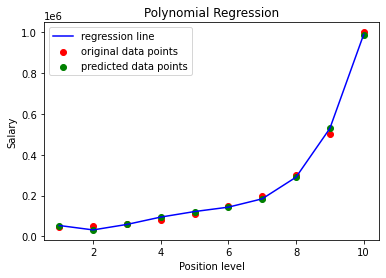

In [15]:
plt.scatter(X, y, color = 'red', label = 'original data points')
plt.scatter(X, y_pred, color = 'green', label = 'predicted data points') 
# this regression line joins predicted points
plt.plot(X, y_pred, color = 'blue', label = 'regression line')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend(loc=0)
plt.show()